In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import cerberus

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
# files
h5 = 'cerberus_annot.h5'
filt_ab = 'cerberus_filtered_abundance.tsv'

## IC detection by novelty categories for polyA genes

In [4]:
df = pd.read_csv(filt_ab, sep='\t')
df, ic_ids = get_tpm_table(df,
               how='ic',
               gene_subset='polya',
               min_tpm=1)

Calculating ic TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1383: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1382: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 149012
# ics >= 1 tpm: 135193
Applying gene type and novelty subset
Number of ics reported: 132337


      novelty  counts
0         ISM   11201
1       Known   82942
2  Monoexonic    1460
3         NIC   21302
4         NNC   15432
Number of complete intron chains: counts    130877
dtype: int64


<Figure size 288x432 with 0 Axes>

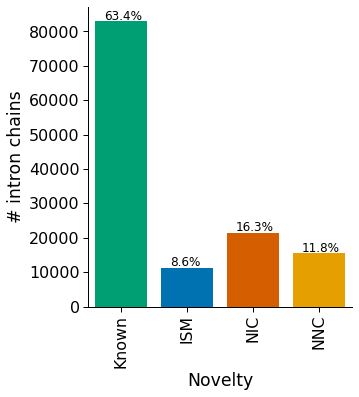

<Figure size 432x288 with 0 Axes>

In [5]:
plot_ic_novelty(h5, 
                source='lapa', 
                oprefix='figures/human',
                pass_list=ic_ids, 
                novs=['Known', 'ISM', 'NIC', 'NNC'])

## Verification that missing ics are from first sd issue

In [23]:
ca = cerberus.read(h5)
temp = ca.t_map.loc[ca.t_map.source=='lapa'].copy(deep=True)
map_ics = temp.ic_id.unique()
ab_ics = df.index.tolist()

In [24]:
map_ics[:5]
# ab_ics[:5]

array(['ENSG00000228794_32', 'ENSG00000187634_29', 'ENSG00000187961_6',
       'ENSG00000187961_7', 'ENSG00000187961_8'], dtype=object)

In [25]:
miss_ics = list(set(map_ics)-set(ab_ics))
miss_ics

['ENSG00000186265_5',
 'ENSG00000136536_10',
 'ENSG00000118729_5',
 'ENSG00000122756_6',
 'ENSG00000161955_10',
 'ENSG00000163536_8',
 'ENSG00000205560_20']

In [26]:
ca.t_map.loc[ca.t_map.ic_id.isin(miss_ics)]

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,tss_first_sd_issue,tes_last_sa_issue,source
22328,ENCODEHT003200255,5,ENSG00000118729_5,ENSG00000118729_1,1,ENSG00000118729_1,1,ENSG00000118729,CASQ2,ENCODEHT003200255,"[1,5,1]","ENSG00000118729[1,5,1]","CASQ2[1,5,1]",True,False,lapa
22329,ENCODEHT003200255#1,5,ENSG00000118729_5,ENSG00000118729_1,1,ENSG00000118729_1,1,ENSG00000118729,CASQ2,ENCODEHT003200255,"[1,5,1]","ENSG00000118729[1,5,1]","CASQ2[1,5,1]",True,False,lapa
122812,ENCODEHT000350234#0,10,ENSG00000161955_10,ENSG00000161955_2,2,ENSG00000161955_1,1,ENSG00000161955,TNFSF13,ENCODEHT000350234,"[2,10,1]","ENSG00000161955[2,10,1]","TNFSF13[2,10,1]",True,False,lapa
170309,ENCODEHT000849603,10,ENSG00000136536_10,ENSG00000136536_1,1,ENSG00000136536_3,3,ENSG00000136536,MARCH7,ENCODEHT000849603,"[1,10,3]","ENSG00000136536[1,10,3]","MARCH7[1,10,3]",True,False,lapa
170310,ENCODEHT000849603#0,10,ENSG00000136536_10,ENSG00000136536_1,1,ENSG00000136536_3,3,ENSG00000136536,MARCH7,ENCODEHT000849603,"[1,10,3]","ENSG00000136536[1,10,3]","MARCH7[1,10,3]",True,False,lapa
208089,ENCODEHT003006918,20,ENSG00000205560_20,ENSG00000205560_1,1,ENSG00000205560_1,1,ENSG00000205560,CPT1B,ENCODEHT003006918,"[1,20,1]","ENSG00000205560[1,20,1]","CPT1B[1,20,1]",True,False,lapa
208090,ENCODEHT003006918#0,20,ENSG00000205560_20,ENSG00000205560_1,1,ENSG00000205560_1,1,ENSG00000205560,CPT1B,ENCODEHT003006918,"[1,20,1]","ENSG00000205560[1,20,1]","CPT1B[1,20,1]",True,False,lapa
213864,ENCODEHT005402898,8,ENSG00000163536_8,ENSG00000163536_2,2,ENSG00000163536_1,1,ENSG00000163536,SERPINI1,ENCODEHT005402898,"[2,8,1]","ENSG00000163536[2,8,1]","SERPINI1[2,8,1]",True,False,lapa
213865,ENCODEHT005402898#0,8,ENSG00000163536_8,ENSG00000163536_2,2,ENSG00000163536_1,1,ENSG00000163536,SERPINI1,ENCODEHT005402898,"[2,8,1]","ENSG00000163536[2,8,1]","SERPINI1[2,8,1]",True,False,lapa
221642,ENCODEHT000709998,5,ENSG00000186265_5,ENSG00000186265_1,1,ENSG00000186265_1,1,ENSG00000186265,BTLA,ENCODEHT000709998,"[1,5,1]","ENSG00000186265[1,5,1]","BTLA[1,5,1]",True,False,lapa


## Verification that ics are the same between the map and the ics

In [30]:
ca = cerberus.read(h5)
temp = ca.t_map.loc[ca.t_map.source=='lapa'].copy(deep=True)
temp = temp[['ic_id']]
nov = ca.ic[['Name', 'novelty']]
temp = temp.merge(nov, how='left', left_on='ic_id', right_on='Name')
temp.drop_duplicates(inplace=True)
temp.groupby('novelty').count()

,ic_id,Name
novelty,,
ISM,11423,11423
Known,99064,99064
Monoexonic,1466,1466
NIC,21393,21393
NNC,15673,15673


In [31]:
temp = ca.ic.loc[ca.ic.source.str.contains('lapa')].copy(deep=True)
temp[['Name', 'novelty']].groupby('novelty').count()

,Name
novelty,
ISM,11423
Known,99064
Monoexonic,1466
NIC,21393
NNC,15673


## Overlap of intron chains b/w cerberus sources

In [4]:
h5 = 'cerberus_annot.h5'
subset = 'polya'
gids = None
# sources = ['v29', 'v40']
o = 'talon_expressed_polya_1tpm_genes.tsv'
gids = pd.read_csv(o, sep='\t').gene_id.tolist()

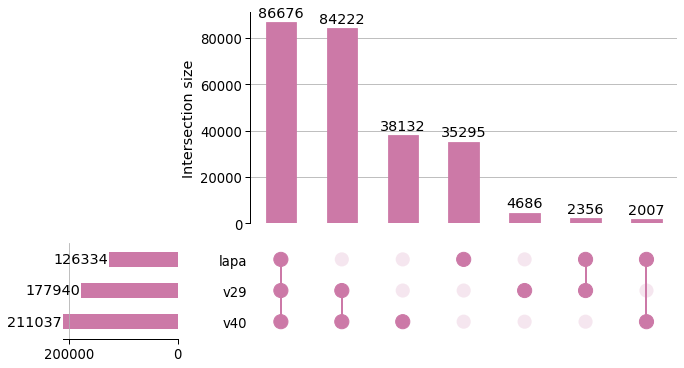

In [5]:
df = plot_ic_upset(h5, 
                   subset=subset,
                   gids=gids)